In [1]:
from tensorflow import keras
from tensorflow import keras
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img
import matplotlib.pyplot as plt

In [2]:
model = keras.models.load_model('./model1.h5')

In [3]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 63, 63, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 61, 61, 32)        9248      
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 30, 30, 32)       0         
 g2D)                                                            
                                                                 
 flatten_6 (Flatten)         (None, 28800)             0         
                                                                 
 dense_22 (Dense)            (None, 96)               

In [4]:
def predict(dir):
    # img = cv2.imread('./test/Audi/23.jpg')
    image = load_img(dir, target_size=(128,128))
    img = np.array(image)
    img = img/255.0
    img = img.reshape(1,128,128,3)
    arr = model.predict(img)
    # name = ["Audi", "Hyundai Creta", "Mahindra Scorpio", "Rolls Royce", "Swift", "Tata Safari", "Toyota Innova"]
    # print(arr)
    plt.imshow(image)
    plt.axis("off")
    plt.title("Es un: "+ mayor(arr))

def mayor(lista):
    max = lista[0][0]
    name = ["Audi", "Hyundai Creta", "Mahindra Scorpio", "Rolls Royce", "Swift", "Tata Safari", "Toyota Innova"]
    i = 0
    for x in lista[0]:
        if x > max:
            max = x
            car = name[i]
        i = i + 1
    return car

1/1 [==============================] - 0s 116ms/step


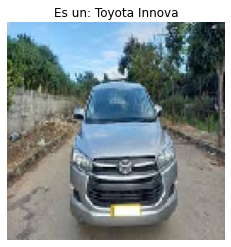

In [5]:
predict('./dataset/test/Toyota Innova/16.jpg')